ERROR! Session/line number was not unique in database. History logging moved to new session 44
total classes detected: 43
Importing Classes........
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
Data shapes
Train(25093, 32, 32, 3) (25093,)
Validation(6274,) (6274, 32, 32, 3)
Test(7842, 32, 32, 3) (7842,)
data shape (43, 2) <class 'pandas.core.frame.DataFrame'>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Con

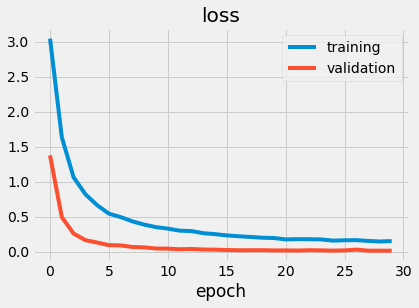

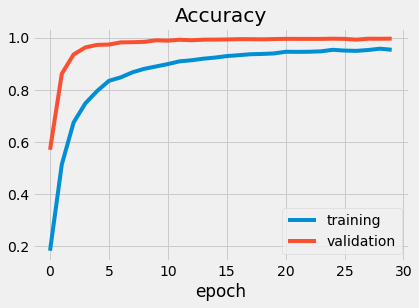

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Test Score: 0.013328166481879894
Test Accuracy: 0.9966844916343689


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Muziwandile\AppData\Local\Temp\ipykernel_10264\4268820713.py", line 188, in <module>
    cv2.waitkey(0)
AttributeError: module 'cv2' has no attribute 'waitkey'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes

  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3396, in run_ast_nodes
    self.showtraceback()
  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 2080, in showtraceback
    value, tb, tb_offset=tb_offset)
  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\ultratb.py", line 1368, in structured_traceback
    self, etype, value, tb, tb_offset, number_of_lines_of_context)
  File "C:\Users\Muziwandile\anaconda3\envs\myenv\lib\site-packages\IPython\core\ultratb.py", line 1268, in structured_traceback
 

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Flatten
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score
np.random.seed(42)
import pickle
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
#from keras.optimizer_v1 import Adam

from matplotlib import style
style.use('fivethirtyeight')

## TODO finish upconfig file
## TODO code data ptoc file n splitting
## TODO build final model


#####------PARAMETERS------####
path= './PycharmProjects/TSR Deploy/Train'
labelfile= './PycharmProjects/TSR Deploy/labels.csv'
batch_size_val = 60
steps_per_epoch_val= 400
epochs_val= 30
imageDimensions= (32,32)
testRatio = 0.2
validationRatio= 0.2


########-------IMPORTING OF IMAGES---------#######
count= 0
images= []
classNo= []
myList= os.listdir(path)
print("total classes detected:", len(myList))
noOfclasses= len(myList)
print("Importing Classes........")
for x in range(0, len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        curImg= cv2.resize(curImg,imageDimensions)
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)


################Split Data

X_train,X_test, y_train, y_test =train_test_split(images,classNo, test_size=testRatio)
X_train,X_validation, y_train, y_validation =train_test_split(X_train,y_train, test_size=validationRatio)

#############Print out Data format and total number of pics
print("Data shapes")
print("Train",end='');print(X_train.shape,y_train.shape)
print("Validation",end='');print(y_validation.shape,X_validation.shape)
print("Test",end='');print(X_test.shape,y_test.shape)

######Read CSV file
data= pd.read_csv(labelfile)
print("data shape", data.shape, type(data))


##########Data pre-processing

def greyscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
#def equalise(img):
    #img= cv2.equalizeHist(img)
    #return img
def preprocessing(img):
    img= greyscale(img)
    #img= equalise(img)
    img= img/255
    return img

####TO Iterate and preprocess all the images

X_train= np.array(list(map(preprocessing, X_train)))
X_test= np.array(list(map(preprocessing, X_test)))
X_validation= np.array(list(map(preprocessing, X_validation)))

################ADD a depth of 1

X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation= X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

###############Augmentation of images To  Makeit more Generic
dataGen= ImageDataGenerator(width_shift_range= 0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

y_train= to_categorical(y_train,noOfclasses)
y_test= to_categorical(y_test,noOfclasses)
y_validation= to_categorical(y_validation,noOfclasses)


myList= os.listdir(path)
noOfclasses= len(myList)
imageDimensions= (32,32,3)

##build model

def myModel():
    no_of_filters= 60
    size_of_filter= (5,5) ##Kernel
    size_of_filter2= (3,3)
    size_of_pool= (2,2)
    no_of_nodes=500   ## number of nodes in hidden layers
    model= Sequential()
    model.add((Conv2D(no_of_filters,size_of_filter,input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu')))  #Adding moreconvolutional layers
    model.add((Conv2D(no_of_filters,size_of_filter,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    ##TODO add second part of model
    model.add((Conv2D(no_of_filters//2,size_of_filter2,activation='relu')))
    model.add((Conv2D(no_of_filters // 2,size_of_filter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_of_nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfclasses,activation='softmax'))
    ##Compile model
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model



##Train model
model= myModel()
print(model.summary())
history= model.fit(dataGen.flow
                             (X_train,y_train,batch_size=batch_size_val),
                             steps_per_epoch=steps_per_epoch_val,
                             epochs=epochs_val,
                             validation_data=(X_test,y_test))

####plot the model
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()



##########
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

#####Save model

pickle_out= open("model_trained.p","wb")
pickle.dump(model,pickle_out)
pickle_out.close()
#cv2.waitkey(0)

#model.save("TSR_v3.h5")

